#Kaggle competition

In [1]:
#upload de arquivo do computador
from google.colab import files
import pandas as pd
import numpy as np
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
#Exporting train.csv
url = '/content/train.csv'
df = pd.read_csv(url)
#exporting test.csv
url2 = '/content/test.csv'
test_data = pd.read_csv(url2)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
#let´s drop any Nan columns
df = df.dropna(axis=1)
test_data = test_data.dropna(axis=1)
test_data.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked
0,892,3,"Kelly, Mr. James",male,0,0,330911,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,S
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,Q
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,S


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,KW
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,0


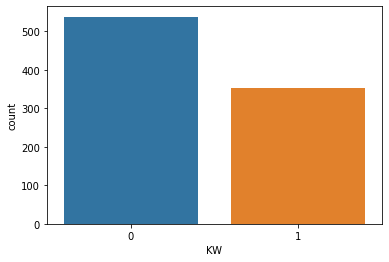

In [7]:
import seaborn as sns
def change_name_to_kids_and_women(df):
  #Inpired by IBRAHIM KARATAS notebook at 'https://www.kaggle.com/competitions/titanic/discussion/378939' you can make a name analysis 
  #to determine not only sex but also age
  #Women and children are the priority, so let´s attach values in the name column
  #KW stans for kids and women
  df["KW"]=df["Name"].str.extract("([A-Za-z]+)\.",expand=False)
  df['KW']=df['KW'].replace(['Ms','Mlle','Miss'],1)
  df['KW']=df['KW'].replace(['Mme','Countess','Lady','Dona','Master','Mrs'],1)
  df['KW']=df['KW'].replace(['Dr','Major','Col','Capt','Sir','Rev','Jonkheer','Don','Mr'],0) #if men, they have a 0 as a label, and also less chamce of survival
  df['KW'].value_counts()
  sns.countplot(df["KW"])
  return df
change_name_to_kids_and_women(df)
df.head()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,KW
0,892,3,"Kelly, Mr. James",male,0,0,330911,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,Q,0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,S,1


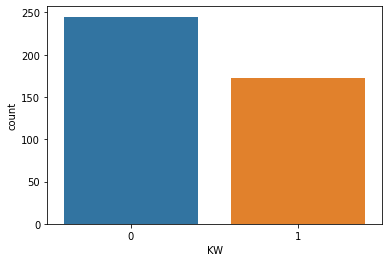

In [8]:
#Doing the same with test_data
change_name_to_kids_and_women(test_data)
test_data.head()

In [9]:
#Since 'Fare' do not exist in the new test_data and also we won´t need 'Name','Parch','Ticket','Survived','PassengerId' 
#in both data sets, let´s exclude them all
y_total = df['Survived']
y_total
#dropping some unused columns
columns_name = ['Name','Parch','Ticket','Survived','PassengerId','Fare']
x_total = df.drop(columns=columns_name)
x_total = pd.get_dummies(x_total,columns=["Sex"]) #assign numbers to labels
x_total.head()

,Pclass,SibSp,KW,Sex_female,Sex_male
0,3,1,0,0,1
1,1,1,1,1,0
2,3,0,1,1,0
3,1,1,1,1,0
4,3,0,0,0,1


In [10]:
col = ['Name','Parch','Ticket','Embarked']
test_data = test_data.drop(columns=col)
test_data = pd.get_dummies(test_data,columns=["Sex"]) #assign numbers to labels
test_data.head()

,PassengerId,Pclass,SibSp,KW,Sex_female,Sex_male
0,892,3,0,0,0,1
1,893,3,1,1,1,0
2,894,2,0,0,0,1
3,895,3,0,0,0,1
4,896,3,1,1,1,0


In [11]:
print('shape of y_total {}; shape of x_total {}'.format(y_total.shape,x_total.shape))

shape of y_total (891,); shape of x_total (891, 5)


In [12]:
import matplotlib.pyplot as plt
import tensorflow as tf
# plt.scatter(x_total['Pclass'].values, x_total['Fare'].values)

In [17]:
#let´s split data: train: 633, valuate: 158, test:100
x_total_list = x_total.values
y_total_list = y_total.values
x_train = x_total_list[:791]
x_val = x_total_list[791:]
x_test = x_total_list[(633+158):]
y_train = y_total_list[:791]
y_val = y_total_list[791:]
y_test = y_total_list[(633+158):]
s = lambda i:i.shape
print('Data shapes: x_train: {}, x_val: {}, x_test: {}, y_train: {}, y_val: {}, y_test: {}'.format(s(x_train),s(x_val),s(x_test),s(y_train),s(y_val),s(y_test)))

Data shapes: x_train: (791, 5), x_val: (100, 5), x_test: (100, 5), y_train: (791,), y_val: (100,), y_test: (100,)


In [19]:
#Check the first 50 elements
y_train[:50]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0])

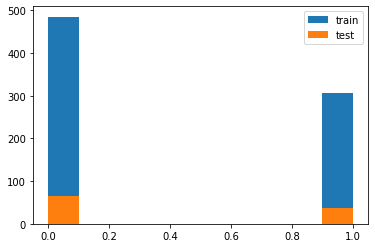

In [20]:
plt.hist(y_train, label='train')
plt.hist(y_test, label = 'test')
plt.legend();

In [21]:
#input shape has 5 features
input_shape = 5
neurons = 50
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(input_shape),
    tf.keras.layers.Dense(neurons, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                300       
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [22]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate =0.001)
model.compile(
    optimizer = opt,
    loss ='binary_crossentropy',
    metrics =['accuracy']
    )

In [23]:
history = model.fit(
    x_train, 
    y_train,
    epochs=100, 
    validation_data = (x_val,y_val)
    )

Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 0.6162 - accuracy: 0.7193 - val_loss: 0.5708 - val_accuracy: 0.7200
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5429 - accuracy: 0.7699 - val_loss: 0.5152 - val_accuracy: 0.7500
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5076 - accuracy: 0.7788 - val_loss: 0.4838 - val_accuracy: 0.7900
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4863 - accuracy: 0.7901 - val_loss: 0.4645 - val_accuracy: 0.7900
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.7914 - val_loss: 0.4525 - val_accuracy: 0.7900
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.7914 - val_loss: 0.4423 - val_accuracy: 0.7900
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4618 - accuracy: 0.7939 - val_loss: 0.4372 - val_accuracy: 0.8000
Epoch 8/100


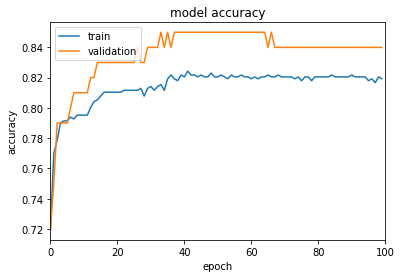

In [25]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.xlim([0,100])
plt.show()

In [27]:
#Evaluating the model performance
print("Train data: ", model.evaluate(x_train, y_train)[1])
print("Eval data: ", model.evaluate(x_val, y_val)[1])
print("Test data: ", model.evaluate(x_test, y_test)[1])

25/25 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8205
Train data:  0.8204804062843323
4/4 [==============================] - 0s 3ms/step - loss: 0.3536 - accuracy: 0.8400
Eval data:  0.8399999737739563
4/4 [==============================] - 0s 3ms/step - loss: 0.3536 - accuracy: 0.8400
Test data:  0.8399999737739563


In [28]:
input_test_data = test_data.drop(columns = 'PassengerId')
input_test_data.head()

,Pclass,SibSp,KW,Sex_female,Sex_male
0,3,0,0,0,1
1,3,1,1,1,0
2,2,0,0,0,1
3,3,0,0,0,1
4,3,1,1,1,0


In [29]:
aux = model.predict(test_data.drop(columns ='PassengerId'))
scal = lambda label: 1 if label >= 0.5 else 0
binarry_out = [scal(die) for die in aux]
out_test_data = {'PassengerId': test_data['PassengerId'].values.tolist(),
                 'Survived':binarry_out}
predictions = pd.DataFrame(out_test_data)
predictions

14/14 [==============================] - 0s 1ms/step


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [30]:
#Downloading
predictions.to_csv("predictions_titanic_v5.csv",index=False)